# MAD-X Simulations

This section is based on the **BL2_Triplet_TDC_full** (Beamline 2, transverse deflector cavity in operation) ATF example.

**Hint**: See the [List of predefined simulations in Sirepo](../simulations.rst) for examples of identifiers for different beamlines.

### Setup and scan model before changing parameters

In [1]:
%run -i ../../../examples/prepare_flyer_env.py

import matplotlib.pyplot as plt

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.madx_flyer import MADXFlyer
from sirepo_bluesky.sirepo_ophyd import create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("madx", "00000002")
classes, objects = create_classes(connection.data,
                                  connection=connection,
                                  extra_model_fields=["rpnVariables", "commands"])
globals().update(**objects)

madx_flyer = MADXFlyer(connection=connection,
                       root_dir="/tmp/sirepo-bluesky-data",
                       report="elementAnimation250-20")

(uid1,) = RE(bp.fly([madx_flyer]))
hdr1 = db[uid1]
tbl1 = hdr1.table(stream_name="madx_flyer", fill=True)
print(tbl1)



Transient Scan ID: 1     Time: 2023-06-22 20:16:11
Persistent Unique Scan ID: 'e880f28c-296f-413b-92f5-209d449252bb'


New stream: 'madx_flyer'





/usr/share/miniconda3/envs/sirepo-bluesky-py3.9/lib/python3.9/site-packages/event_model/__init__.py:275: UserWarning: The document type 'bulk_events' has been deprecated in favor of 'event_page', whose structure is a transpose of 'bulk_events'.
  warnings.warn(


                                 time      madx_flyer_NAME madx_flyer_S  \
seq_num                                                                   
1       2023-06-22 20:16:20.382634640  BEAMLINE_FULL$START          0.0   
2       2023-06-22 20:16:20.382684231                 HO00          0.2   
3       2023-06-22 20:16:20.382711411                HPOP1          0.2   
4       2023-06-22 20:16:20.382732391                HT1HV          0.2   
5       2023-06-22 20:16:20.382753134                 HO01         0.37   
...                               ...                  ...          ...   
147     2023-06-22 20:16:20.385221481                 IO20     28.28665   
148     2023-06-22 20:16:20.385299683                  IQ9     28.36265   
149     2023-06-22 20:16:20.385323763                 IO21     28.86265   
150     2023-06-22 20:16:20.385342360                 IP85     28.86265   
151     2023-06-22 20:16:20.385361433    BEAMLINE_FULL$END     28.86265   

        madx_flyer_BETX 

### Scan again after changing parameters

In [2]:
def madx_plan(element=match8, parameter=ihq1, value=1.0):
    yield from bps.mv(element.deltap, value)
    yield from bps.mv(parameter.value, value)
    return (yield from bp.fly([madx_flyer]))

(uid2,) = RE(madx_plan())
hdr2 = db[uid2]
tbl2 = hdr2.table(stream_name="madx_flyer", fill=True)
print(tbl2)



Transient Scan ID: 2     Time: 2023-06-22 20:16:20
Persistent Unique Scan ID: '07bc0f2f-6bcf-4369-aa2f-b219e956d67d'


New stream: 'madx_flyer'





/usr/share/miniconda3/envs/sirepo-bluesky-py3.9/lib/python3.9/site-packages/event_model/__init__.py:275: UserWarning: The document type 'bulk_events' has been deprecated in favor of 'event_page', whose structure is a transpose of 'bulk_events'.
  warnings.warn(


                                 time      madx_flyer_NAME madx_flyer_S  \
seq_num                                                                   
1       2023-06-22 20:16:25.924230576  BEAMLINE_FULL$START          0.0   
2       2023-06-22 20:16:25.924286127                 HO00          0.2   
3       2023-06-22 20:16:25.924312353                HPOP1          0.2   
4       2023-06-22 20:16:25.924333334                HT1HV          0.2   
5       2023-06-22 20:16:25.924354315                 HO01         0.37   
...                               ...                  ...          ...   
147     2023-06-22 20:16:25.927308321                 IO20     28.28665   
148     2023-06-22 20:16:25.927326918                  IQ9     28.36265   
149     2023-06-22 20:16:25.927345514                 IO21     28.86265   
150     2023-06-22 20:16:25.927361727                 IP85     28.86265   
151     2023-06-22 20:16:25.927377224    BEAMLINE_FULL$END     28.86265   

        madx_flyer_BETX 

### Get the data via databroker API and plot

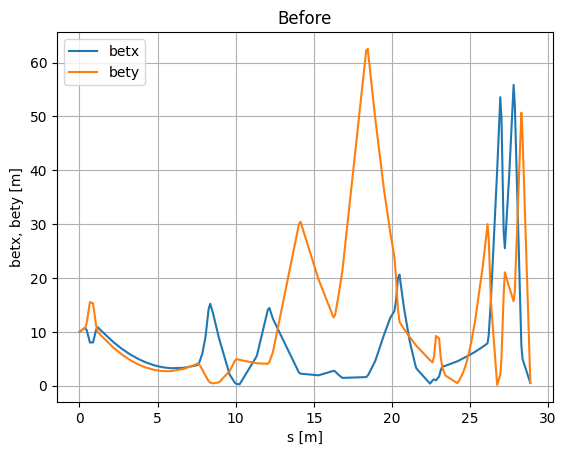

In [3]:
# Before changing parameters
s1 = tbl1["madx_flyer_S"]
betx1 = tbl1["madx_flyer_BETX"]
bety1 = tbl1["madx_flyer_BETY"]

plt.figure()
plt.plot(s1, betx1, label="betx")
plt.plot(s1, bety1, label="bety")
plt.xlabel("s [m]")
plt.ylabel("betx, bety [m]")
plt.title("Before")
plt.grid()
plt.legend()

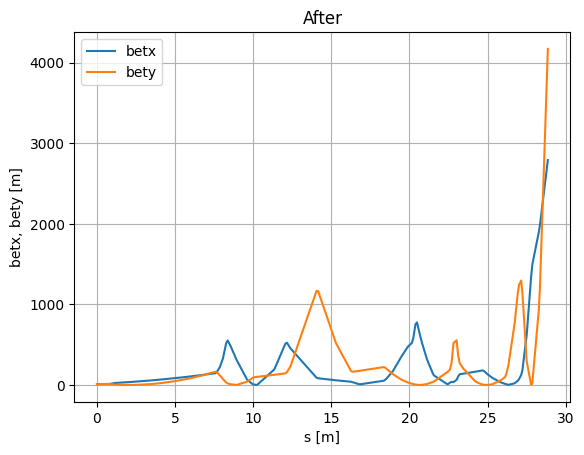

In [4]:
# After changing parameters
s2 = tbl2["madx_flyer_S"]
betx2 = tbl2["madx_flyer_BETX"]
bety2 = tbl2["madx_flyer_BETY"]

plt.figure()
plt.plot(s2, betx2, label="betx")
plt.plot(s2, bety2, label="bety")
plt.xlabel("s [m]")
plt.ylabel("betx, bety [m]")
plt.title("After")
plt.grid()
plt.legend()

### Get the data from the raw TFS file and plot

In [5]:
import os
import tfs

for name, doc in hdr2.documents():
    if name == "resource":
        resource_doc = doc
        print(resource_doc)

filename = os.path.join(resource_doc["root"], resource_doc["resource_path"])
df = tfs.read(filename)


Resource
path_semantics  : posix                                   
resource_kwargs :
resource_path   : 2023/06/22/69ee7fe8-73a6-42e1-ad40-016c397634e0.tfs
root            : /tmp/sirepo-bluesky-data                
run_start       : 07bc0f2f-6bcf-4369-aa2f-b219e956d67d    
spec            : madx                                    
uid             : c8166e6a-2e41-473b-9ebf-bbbbbbd818e5    


In [6]:
df

,NAME,S,BETX,ALFX,BETY,ALFY,DX,DY
0,BEAMLINE_FULL$START,0.00000,10.000000,-1.000000,10.000000,-1.000000,0.000000,0.0
1,HO00,0.20000,10.408000,-1.040000,10.408000,-1.040000,0.000000,0.0
2,HPOP1,0.20000,10.408000,-1.040000,10.408000,-1.040000,0.000000,0.0
3,HT1HV,0.20000,10.408000,-1.040000,10.408000,-1.040000,0.000000,0.0
4,HO01,0.37000,10.767380,-1.074000,10.767380,-1.074000,0.000000,0.0
...,...,...,...,...,...,...,...,...
146,IO20,28.28665,1900.023170,-512.983326,939.052319,-1904.117613,1.046575,0.0
147,IQ9,28.36265,1994.298015,-730.748030,1241.777577,-2068.588869,1.073607,0.0
148,IO21,28.86265,2791.986102,-864.628142,4171.845384,-3791.546745,1.279162,0.0
149,IP85,28.86265,2791.986102,-864.628142,4171.845384,-3791.546745,1.279162,0.0


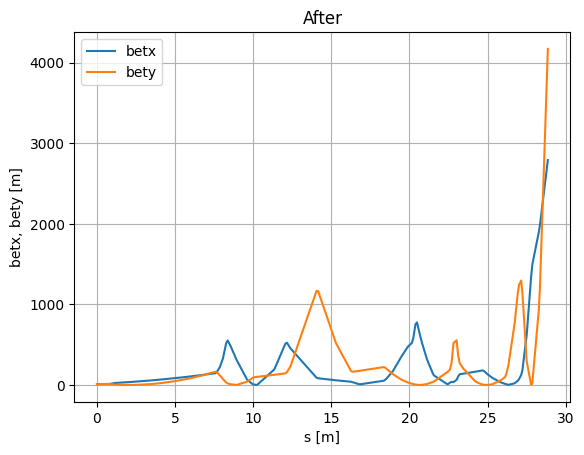

In [7]:
plt.figure()
plt.plot(df["S"], df["BETX"], label="betx")
plt.plot(df["S"], df["BETY"], label="bety")
plt.xlabel("s [m]")
plt.ylabel("betx, bety [m]")
plt.title("After")
plt.grid()
plt.legend()

## Screenshots from Sirepo Website

### Original model, before changing parameters

![image.png](../../../images/madx_before_twiss3_file.png)

### After changing parameters

![image2.png](../../../images/madx_after_twiss3_file.png)
